In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import random
import zipfile
from google.colab import drive

# improve visualization
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [ ]:
# connecting the colab to the Google Drive
drive.mount('/content/drive')

# extracting the dataset
path = '/content/drive/MyDrive/Pneumonia.zip'
zip = zipfile.ZipFile(file=path, mode='r')
zip.extractall('./')
zip.close

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Pneumonia.zip' mode='r'>>

In [ ]:
dir_train = '/content/chest_xray/train' 
dir_valid = '/content/chest_xray/val'
dir_test = '/content/chest_xray/test'

labels = ['NORMAL', 'PNEUMONIA'] # creating the labels

dataset_train = []
dataset_valid = []
dataset_test = []
 
def load_train_dataset(): # creating function to load dataset_train
  for label in labels:
    path = os.path.join(dir_train, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_train.append([resize_img, class_num])
      except Exception as e:
        pass

def load_valid_dataset(): # function to load dataset_valid
  for label in labels:
    path = os.path.join(dir_valid, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_valid.append([resize_img, class_num])
      except Exception as e:
        pass

def load_test_dataset(): # function to load dataset_test
  for label in labels:
    path = os.path.join(dir_test, label)
    class_num = labels.index(label)
    for imagem in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, imagem), cv2.IMREAD_GRAYSCALE)
        resize_img = cv2.resize(img_array, (150,150))
        dataset_test.append([resize_img, class_num])
      except Exception as e:
        pass

load_train_dataset()
load_valid_dataset()
load_test_dataset()

In [ ]:
x_train_ini = []
y_train = []

x_valid_ini = []
y_valid = []

x_test_ini = []
y_test = []

for features, label in dataset_train:
  x_train_ini.append(features)
  y_train.append(label)

for features, label in dataset_valid:
  x_valid_ini.append(features)
  y_valid.append(label)

for features, label in dataset_test:
  x_test_ini.append(features)
  y_test.append(label)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


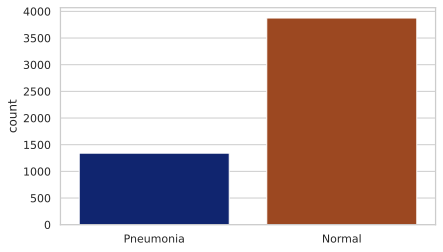

In [ ]:
graph_label = []

for i in dataset_train:
  if (i[1] == 1):
    graph_label.append('Normal')
  else:
    graph_label.append('Pneumonia')
sns.countplot(graph_label)

Text(0.5, 0, 'PNEUMONIA')

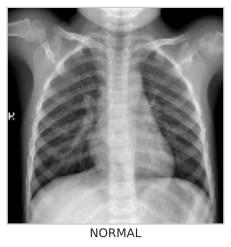

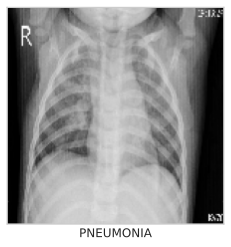

In [ ]:
# Healthy Lung
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(dataset_train[0][0], cmap='gray')
plt.xlabel(labels[dataset_train[0][1]])

# lung with pneumonia
plt.figure(figsize=(4,4))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(dataset_train[-1][0], cmap='gray')
plt.xlabel(labels[dataset_train[-1][1]])

In [ ]:

# function to normalize the pixels
f_norm = lambda x: (np.array(x) / 255.0).astype('float32')

x_train = f_norm(x_train_ini)
x_valid = f_norm(x_valid_ini)
x_test = f_norm(x_test_ini) 

# shape:
print('Shape x_train: {} \nShape x_valid: {} \nShape x_test: {}'.format(
    x_train.shape, x_valid.shape, x_test.shape))

Shape x_train: (5216, 150, 150) 
Shape x_valid: (16, 150, 150) 
Shape x_test: (624, 150, 150)


In [ ]:
# resize function
f_resize = lambda x: np.array(x).reshape(-1, 150, 150, 1)

x_train = f_resize(x_train)
x_valid = f_resize(x_valid)
x_test = f_resize(x_test)

# let's print the shape again to check the changes
print('Shape x_train: {} \nShape x_valid: {} \nShape x_test: {}'.format(
    x_train.shape, x_valid.shape, x_test.shape))

Shape x_train: (5216, 150, 150, 1) 
Shape x_valid: (16, 150, 150, 1) 
Shape x_test: (624, 150, 150, 1)


In [ ]:

# function to convert to array
fc = lambda x: np.array(x)

x_train = fc(x_train)
y_train = fc(y_train)
x_valid = fc(x_valid)
y_valid = fc(y_valid)
x_test = fc(x_test)
y_test = fc(y_test)

In [ ]:
data_gen = ImageDataGenerator(
    rotation_range = 50,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [ ]:
data_gen.fit(x_test)

In [ ]:
model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding='same', activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1 ,padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(MaxPool2D((2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [ ]:
history = model.fit(data_gen.flow(
x_train, y_train, batch_size=32, shuffle=True),
epochs=10, validation_data = (x_valid, y_valid), callbacks=[learning_rate_reduction])

Epoch 1/10
163/163 [==============================] - 307s 2s/step - loss: 0.1403 - accuracy: 0.9521 - val_loss: 1.1322 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 2/10
163/163 [==============================] - 310s 2s/step - loss: 0.1332 - accuracy: 0.9530 - val_loss: 0.4062 - val_accuracy: 0.9375 - lr: 3.0000e-04
Epoch 3/10
163/163 [==============================] - 310s 2s/step - loss: 0.1283 - accuracy: 0.9565 - val_loss: 0.4666 - val_accuracy: 0.8125 - lr: 3.0000e-04
Epoch 4/10
163/163 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9555
Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [==============================] - 309s 2s/step - loss: 0.1266 - accuracy: 0.9555 - val_loss: 2.4149 - val_accuracy: 0.4375 - lr: 3.0000e-04
Epoch 5/10
163/163 [==============================] - 309s 2s/step - loss: 0.1112 - accuracy: 0.9620 - val_loss: 0.7198 - val_accuracy: 0.7500 - lr: 9.0000e-05
Epoch 6/10
163/163 [===============

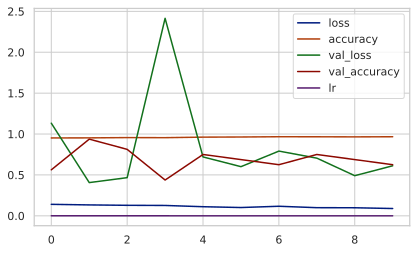

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

In [ ]:
img = '/content/chest_xray/test/PNEUMONIA/person108_bacteria_506.jpeg'
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
resize_img = cv2.resize(img_array, (150,150))

resize_img = np.array(resize_img) / 255.0
resize_img = f_resize(resize_img)

print(model.predict(resize_img))

[[0.97702646]]
